# Projet Deep Learning pour aider au ramassage de champignon en foret

on fait les installations

In [12]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *
from fastai.vision.all import *

on indique le chemin vers le dataset de 3000 photos de champignons

In [13]:
path = "/content/gdrive/MyDrive/archive"
fns = get_image_files(path)
fns

(#3401) [Path('/content/gdrive/MyDrive/archive/poisonous sporocarp/nncv (1059).jpg'),Path('/content/gdrive/MyDrive/archive/poisonous sporocarp/nncv (1058).jpg'),Path('/content/gdrive/MyDrive/archive/poisonous sporocarp/nncv (1057).jpg'),Path('/content/gdrive/MyDrive/archive/poisonous sporocarp/nncv (1056).jpg'),Path('/content/gdrive/MyDrive/archive/poisonous sporocarp/nncv (1055).jpg'),Path('/content/gdrive/MyDrive/archive/poisonous sporocarp/nncv (1054).jpg'),Path('/content/gdrive/MyDrive/archive/poisonous sporocarp/nncv (1053).jpg'),Path('/content/gdrive/MyDrive/archive/poisonous sporocarp/nncv (1052).jpg'),Path('/content/gdrive/MyDrive/archive/poisonous sporocarp/nncv (62).jpeg'),Path('/content/gdrive/MyDrive/archive/poisonous sporocarp/nncv (1068).jpg')...]

In [14]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [15]:
mushrooms = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [16]:
dls = mushrooms.dataloaders(path)

on vérifie que ça charge correctement

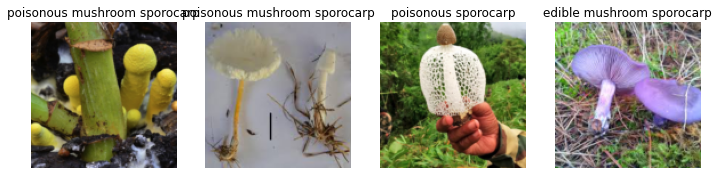

In [17]:
dls.valid.show_batch(max_n=4, nrows=1)

ensuite on fait de la data augmentation


In [18]:
mushrooms = mushrooms.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = mushrooms.dataloaders(path)

on fait un entrainement

In [19]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.548297,0.882206,0.310294,02:23


epoch,train_loss,valid_loss,error_rate,time
0,0.900526,0.725326,0.267647,00:47
1,0.768770,0.629150,0.229412,00:47
2,0.605337,0.580120,0.208824,00:46
3,0.475999,0.542347,0.201471,00:46


on fait la matrice de confusion pour vérifier la précision

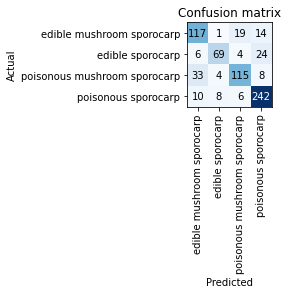

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

c'est pas super sauf pour les poisonous sporocap

mais on va faire un test quand meme

In [38]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [40]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [39]:
img = PILImage.create(btn_upload.data[-1])
is_edible,_,probs = learn.predict(img)
print(f"It's probably a : {is_edible}.")
print(f"With a probability of : {probs[1].item():.6f}")

It's probably a : poisonous sporocarp.
With a probability of : 0.355460
